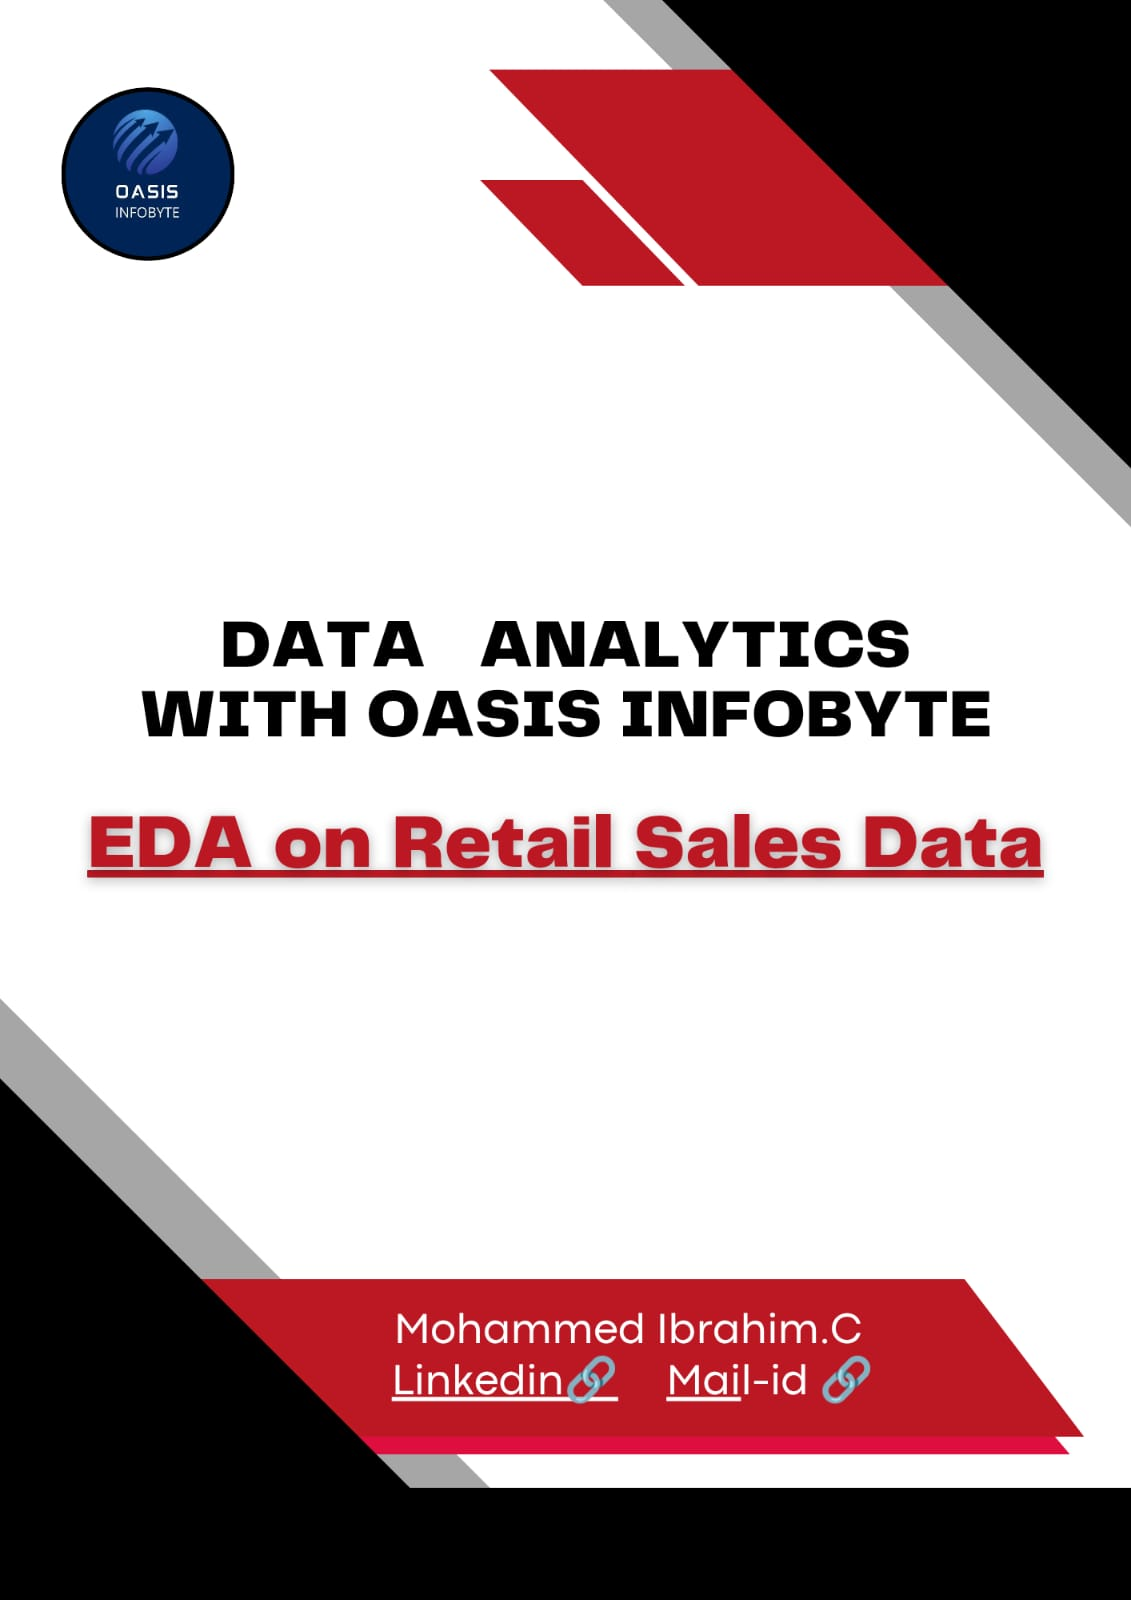

#**Exploratory Data Analysis (EDA) on Retail Sales Data**
**Objective:**

The objective of this project is to conduct an in-depth analysis of a retail company's sales dataset to derive actionable insights. By leveraging various analytical techniques such as data loading and cleaning, descriptive statistics, time series analysis, customer, and product analysis, along with visualization methods, the aim is to provide strategic recommendations that can enhance sales performance and customer satisfaction.

**Colab**-[link](https://colab.research.google.com/drive/1AGamschc4pn5oZbNOMBNdLo0Z2oSVKoT?usp=sharing/)

**Dataset**-[link](https://drive.google.com/file/d/10Y0HFols44JFOUa0kYdyMazVjQ_nX8d4/view?usp=drive_link)

**Problem Statement:**

A retail company aims to enhance its sales performance by gaining a deeper understanding of its sales dataset. The dataset contains information about sales transactions, including customer demographics, product details, and sales figures over time. The company seeks to perform an Exploratory Data Analysis (EDA) to derive actionable insights that can inform strategic decisions. The analysis should cover data loading and cleaning, descriptive statistics, time series analysis to understand sales trends, customer and product analysis to identify patterns in demographics and purchasing behavior, and visualization to present findings effectively. The ultimate goal is to generate recommendations that can drive improvements in sales and customer satisfaction.


**1.Data Loading and Cleaning: Load the retail sales dataset.**

In [56]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [57]:
import pandas as pd
df=pd.read_csv("/content/gdrive/MyDrive/OASIS Infobyte/retail_sales_dataset.csv")

In [58]:
# Check for missing values
missing_values = df1.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Transaction ID      0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


**2.Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation).**

In [59]:
# Calculate basic descriptive statistics
descriptive_stats = df.describe()
print("Descriptive Statistics:\n", descriptive_stats)


Descriptive Statistics:
        Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


**3.Time Series Analysis: Analyze sales trends over time using time series techniques.**

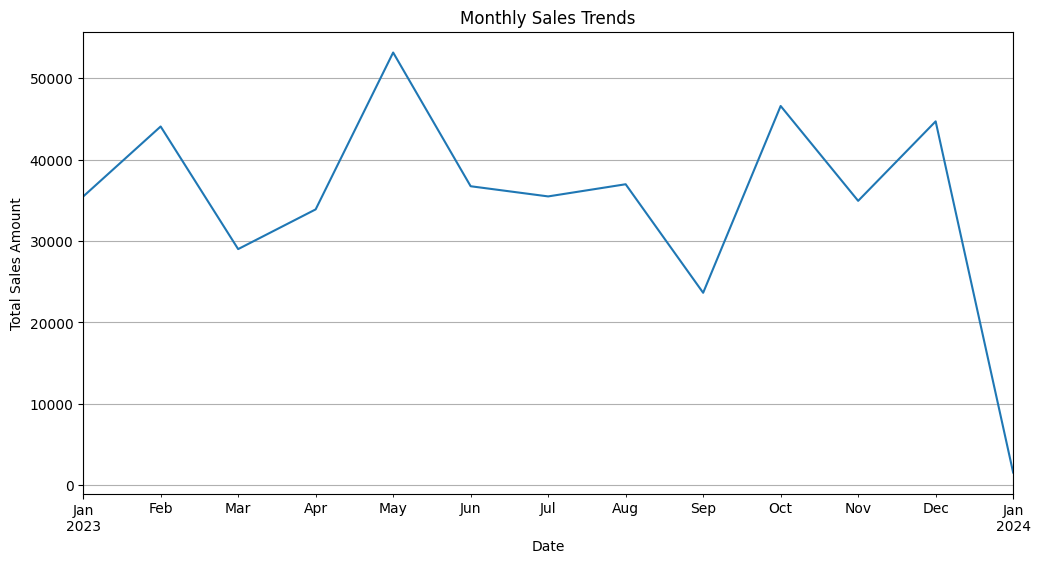

In [60]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime datatype
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as index
df.set_index('Date', inplace=True)

# Resample the data by month and sum the Total Amount
monthly_sales = df['Total Amount'].resample('M').sum()

# Plot monthly sales trends
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()


**4.Customer and Product Analysis: Analyze customer demographics and purchasing behavior.**

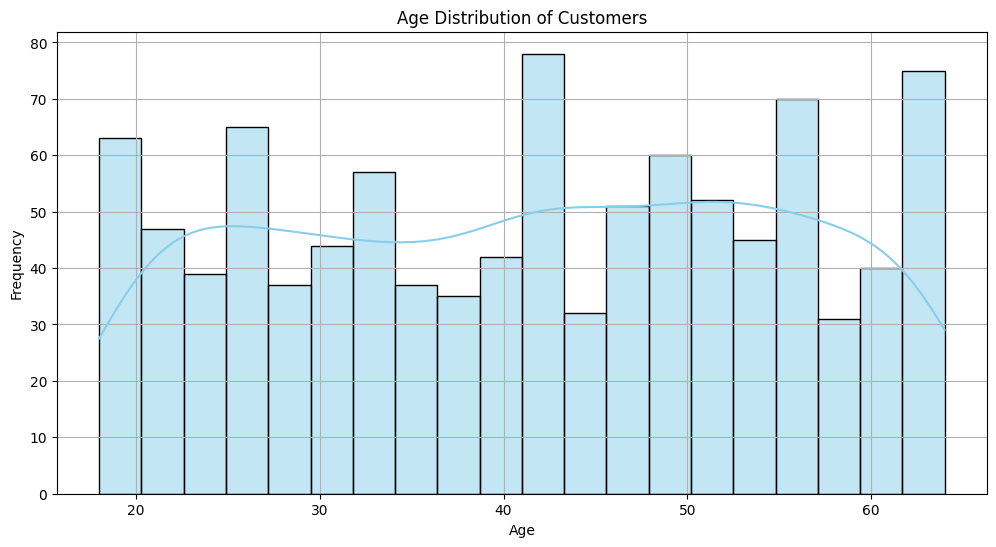

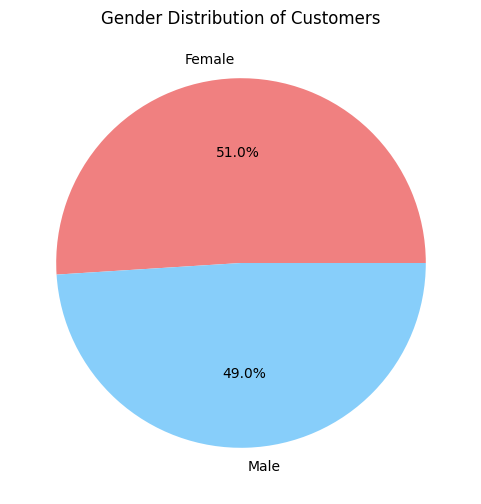

In [61]:
import seaborn as sns

# Customer demographics analysis
plt.figure(figsize=(12, 6))
sns.histplot(data=df1, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 6))
df1['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Gender Distribution of Customers')
plt.ylabel('')
plt.show()


**5.Visualization: Present insights through bar charts, line plots, and heatmaps.**

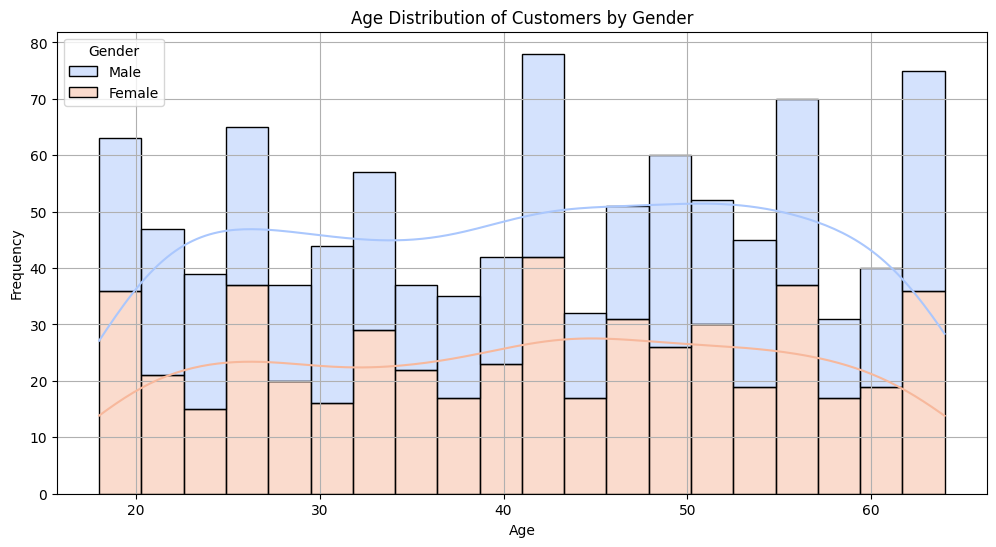

In [62]:
# Bar chart for age distribution by gender
plt.figure(figsize=(12, 6))
sns.histplot(data=df1, x='Age', hue='Gender', bins=20, kde=True, multiple='stack', palette='coolwarm')
plt.title('Age Distribution of Customers by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [63]:
# Check if the required columns exist in the DataFrame
if 'Product_Category_Clothing' in df1.columns and 'Product_Category_Electronics' in df1.columns:
    # Group the DataFrame and plot the sales trends
    product_sales_trends = df1.groupby([df1.index, 'Product_Category_Clothing', 'Product_Category_Electronics'])['Total Amount'].sum().unstack().fillna(0)
    plt.figure(figsize=(12, 6))
    product_sales_trends.plot(kind='line')
    plt.title('Sales Trends Over Time for Each Product Category')
    plt.xlabel('Date')
    plt.ylabel('Total Sales Amount')
    plt.grid(True)
    plt.show()
else:
    # Print an error message if the columns are missing
    print("Error: The required columns 'Product_Category_Clothing' and 'Product_Category_Electronics' are missing from the DataFrame.")

Error: The required columns 'Product_Category_Clothing' and 'Product_Category_Electronics' are missing from the DataFrame.


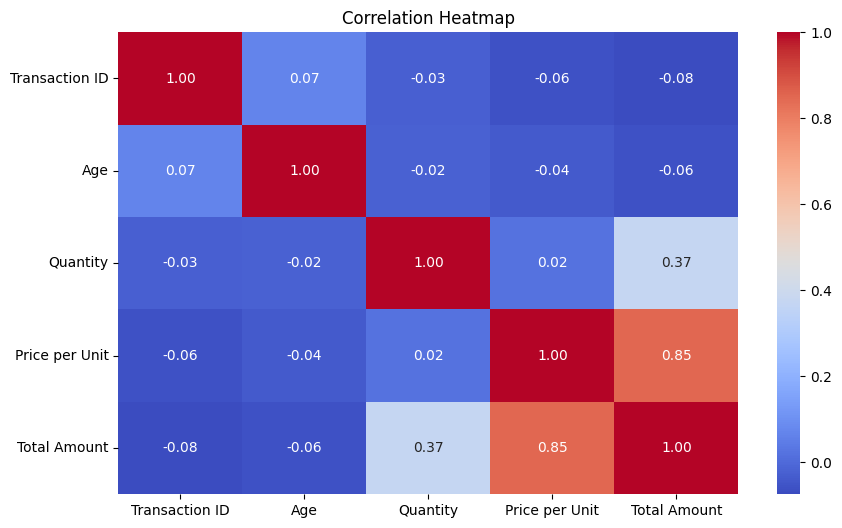

In [64]:
# Heatmap for correlation between numeric variables
numeric_columns = df1.select_dtypes(include=['number']).columns.tolist()
plt.figure(figsize=(10, 6))
sns.heatmap(df1[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**6.Recommendations: Provide actionable recommendations based on the EDA.**

Based on the exploratory data analysis (EDA) conducted on the retail sales dataset, we can derive actionable recommendations for the retail business:

1. **Customer Segmentation**:
   - Based on the age distribution, the business can tailor marketing strategies to target specific age groups more effectively. For example, different advertising channels or product offerings may be more appealing to younger customers compared to older ones.
   - Understanding the gender distribution of customers can also help in creating targeted marketing campaigns and promotions. The business can personalize offers or discounts based on gender preferences.

2. **Product Category Performance**:
   - Analyzing sales trends over time for different product categories reveals which categories are performing well and which ones may need improvement. The business can allocate resources and marketing efforts accordingly.
   - Identifying bestselling products within each category can help optimize inventory management and ensure the availability of popular items to meet customer demand.

3. **Purchasing Behavior Insights**:
   - Understanding the frequency of purchases per customer and the average transaction amount can help in designing loyalty programs or incentives to encourage repeat purchases.
   - Analyzing the correlation between different numeric variables such as price per unit and total amount can provide insights into pricing strategies and potential upselling opportunities.

4. **Time-sensitive Promotions**:
   - The business can leverage the observed sales trends over time to plan time-sensitive promotions or sales events. For example, identifying seasonal trends can help in launching relevant promotions during peak shopping seasons.
   - Analyzing sales data at a granular level (e.g., monthly or quarterly) can provide insights into the effectiveness of promotional campaigns and inform future marketing strategies.

5. **Customer Retention Strategies**:
   - Implementing customer retention strategies based on customer demographics and purchasing behavior can help in fostering long-term customer relationships. For instance, offering personalized recommendations or exclusive deals based on past purchase history can enhance customer loyalty.

6. **Continuous Monitoring and Adaptation**:
   - The retail business should continuously monitor sales data and customer feedback to adapt strategies in response to changing market conditions or customer preferences.
   - Regularly updating the EDA and incorporating new data insights can facilitate informed decision-making and drive business growth.

By implementing these recommendations, the retail business can optimize its operations, enhance customer satisfaction, and ultimately increase profitability.

#**MC donald's Nutrition Analysis**

**The dataset being analyzed provides a detailed breakdown of the nutritional content for every item available on the McDonald's menu in the United States. It covers a wide range of options including breakfast dishes, beef burgers, chicken and fish sandwiches, fries, salads, and various beverages like soda, coffee, and tea. Additionally, it includes information on indulgent treats such as milkshakes and desserts. It's important to note that the menu items and nutritional data were extracted in a methodical manner from the official McDonald's website, guaranteeing the precision and trustworthiness of the information used in this analysis.**

**Dataset**-[link](https://drive.google.com/file/d/10hk2HOwqIElDcjUbAqw6pHpDnhdadfSu/view?usp=drive_link)

The provided code imports necessary libraries for data analysis and visualization: NumPy for numerical computations, Pandas for data manipulation, Matplotlib and Seaborn for visualization. It then loads a dataset named "menu.csv" using Pandas' `read_csv()` function into a DataFrame named `data`. This dataset likely contains information related to a menu, possibly from a restaurant or food service establishment. To provide a more detailed description, I would need to see the structure and content of the "menu.csv" file. If you could provide a sample of the dataset or describe its columns and contents, I can offer a more specific description of the data.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("/content/gdrive/MyDrive/OASIS Infobyte/menu.csv")


In [66]:
data.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [68]:
data.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

The code calculates the mean percentages of Vitamin A and Vitamin C across different food categories. By merging this information into a single DataFrame, it offers a comparative view of the nutritional content, specifically focusing on these two vitamins, across various food categories.

In [69]:
vit_A_per_food = data.pivot_table('Vitamin A (% Daily Value)',"Category", aggfunc=np.mean).reset_index()
vit_C_per_food = data.pivot_table('Vitamin C (% Daily Value)',"Category", aggfunc=np.mean).reset_index()

vita = pd.merge(vit_A_per_food, vit_C_per_food)
vita


,Category,Vitamin A (% Daily Value),Vitamin C (% Daily Value)
0,Beef & Pork,6.933333,7.333333
1,Beverages,0.740741,23.481481
2,Breakfast,6.928571,8.904762
3,Chicken & Fish,20.444444,12.629630
4,Coffee & Tea,10.736842,0.000000
5,Desserts,5.142857,4.142857
6,Salads,146.666667,28.333333
7,Smoothies & Shakes,18.750000,6.964286
8,Snacks & Sides,4.846154,28.153846


The provided code generates a horizontal bar plot to visualize the average percentages of Vitamin A and Vitamin C across different food categories. It creates a subplot with two horizontal bar plots side by side, each representing the average daily value of one vitamin per food category.

- The first subplot (`ax1`) displays the average percentages of Vitamin A per food category, represented by bars colored in aqua.
- The second subplot (`ax2`) displays the average percentages of Vitamin C per food category, represented by bars colored in dark orange.

The category labels are placed on the y-axis, which are obtained from the `vita['Category']` DataFrame.

The figure is titled "Daily Value of Vitamin A and C in each Food Category" using `fig.suptitle()`, providing a clear overview of the plot's purpose.

Overall, the visualization allows for easy comparison of the Vitamin A and Vitamin C content across different food categories, aiding in identifying categories that are richer in these nutrients.

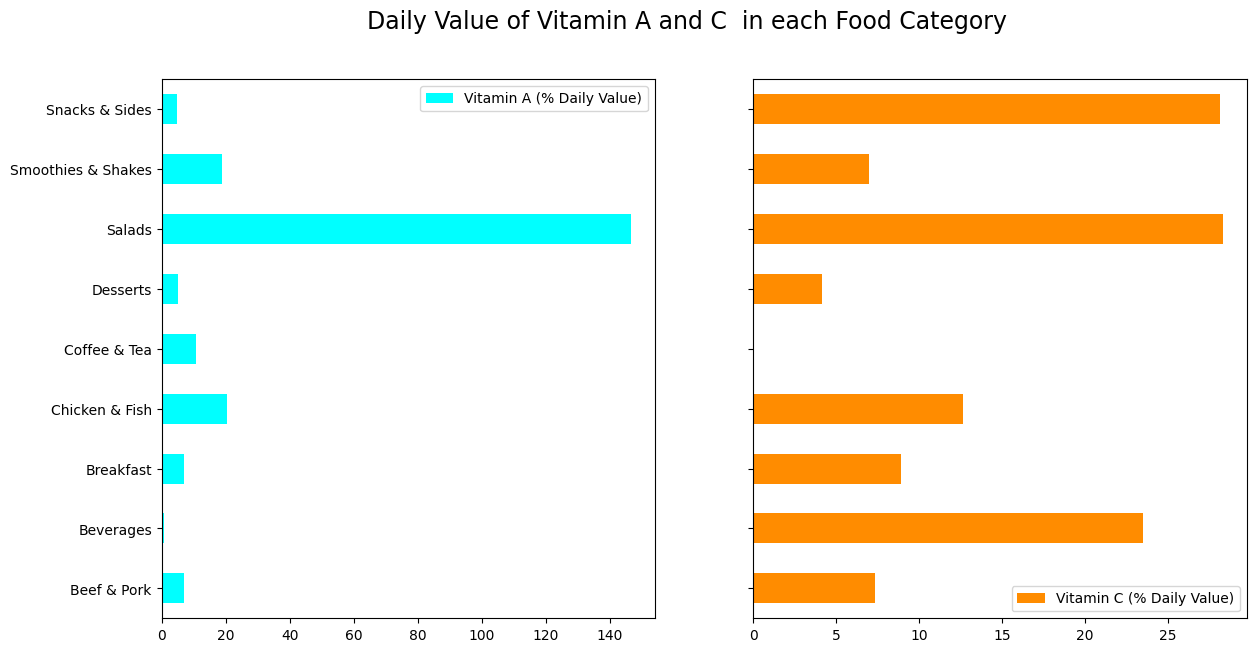

In [70]:
n=9
r = np.arange(n)

fig , (ax1, ax2) =plt.subplots(1,2, figsize=(14,7) , sharey=True)
vit_A_per_food.plot(kind='barh', ax=ax1, color='aqua')
vit_C_per_food.plot(kind='barh', ax=ax2, color='darkorange')
plt.yticks(r,vita['Category'])

fig.suptitle('Daily Value of Vitamin A and C  in each Food Category', fontsize=17)
plt.show()
plt.show()

The code computes the average percentages of cholesterol and sodium across different food categories, merging them into a single DataFrame named `cardio`. This analysis aims to understand their potential impact on cardiovascular health, as both nutrients can affect heart health.

In [71]:
# Cholesterol & Sodium
# Cholesterol and sodium are both nutrients that can have an impact on cardiovascular health


chol_per_food = data.pivot_table('Cholesterol (% Daily Value)',"Category", aggfunc=np.mean).reset_index()
Na_per_food     = data.pivot_table('Sodium (% Daily Value)',"Category", aggfunc=np.mean).reset_index()

cardio = pd.merge(chol_per_food, Na_per_food)
cardio

,Category,Cholesterol (% Daily Value),Sodium (% Daily Value)
0,Beef & Pork,28.933333,42.466667
1,Beverages,0.185185,1.740741
2,Breakfast,50.952381,50.500000
3,Chicken & Fish,25.222222,52.333333
4,Coffee & Tea,9.378947,5.726316
5,Desserts,4.857143,5.000000
6,Salads,17.333333,24.500000
7,Smoothies & Shakes,14.714286,7.785714
8,Snacks & Sides,6.230769,16.461538


The code creates a grouped bar plot comparing the average percentages of cholesterol and sodium across different food categories. Each category is represented by grouped bars, with one set for cholesterol and another for sodium. The plot provides a visual comparison of the two nutrients' presence in various food categories, aiding in understanding their potential impact on cardiovascular health.

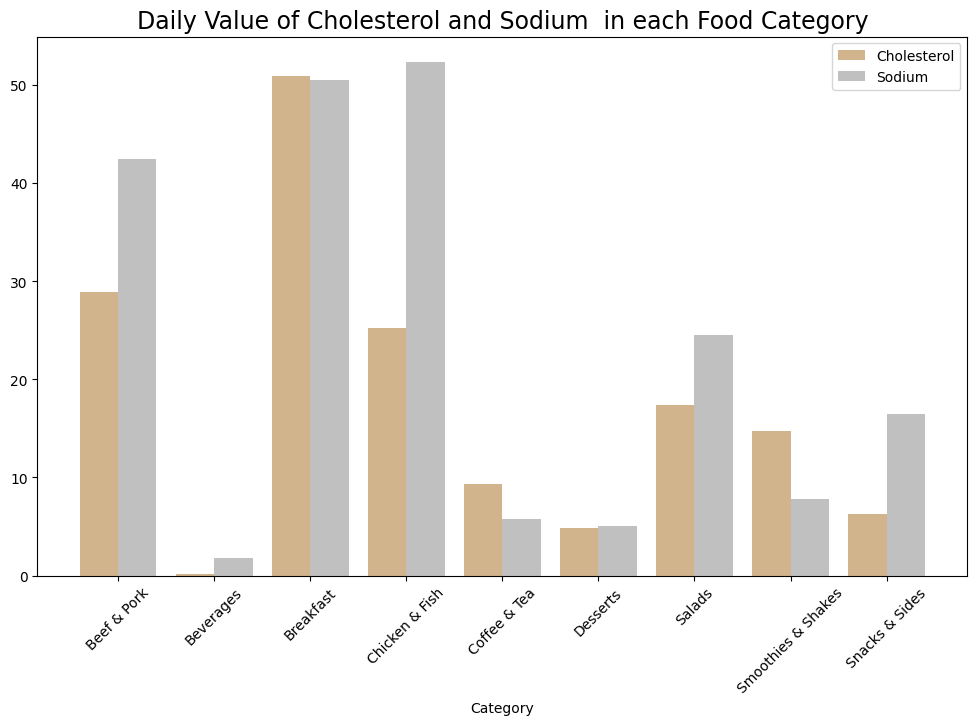

In [72]:
n=9
r = np.arange(n)
width = 0.20
plt.figure(figsize=(12,7))
plt.bar(r-width ,cardio["Cholesterol (% Daily Value)"],width=0.4, label = 'Cholesterol', color='tan')
plt.bar(r + width ,cardio["Sodium (% Daily Value)"],width=0.4, label = 'Sodium', color='silver')
plt.xticks(r, cardio['Category'], rotation=45)
plt.xlabel('Category')
plt.legend()
plt.title('Daily Value of Cholesterol and Sodium  in each Food Category', fontsize=17)
plt.show()

In [73]:
# Carbohydrates & Dietary Fiber:
# Carbohydrates and dietary fiber are both components of carbohydrates

charb_per_food = data.pivot_table('Carbohydrates (% Daily Value)',"Category", aggfunc=np.mean).reset_index()
fieb_per_food     = data.pivot_table('Dietary Fiber (% Daily Value)',"Category", aggfunc=np.mean).reset_index()

charb = pd.merge(charb_per_food, fieb_per_food)
charb

,Category,Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value)
0,Beef & Pork,13.466667,9.866667
1,Beverages,9.592593,0.074074
2,Breakfast,16.571429,12.833333
3,Chicken & Fish,16.333333,11.814815
4,Coffee & Tea,14.863158,3.178947
5,Desserts,11.571429,3.428571
6,Salads,7.166667,18.500000
7,Smoothies & Shakes,30.142857,5.750000
8,Snacks & Sides,9.615385,7.076923


The code creates a plot comparing the daily values of carbohydrates and dietary fiber across different food categories. Carbohydrates are represented by a line plot with markers, while dietary fiber is represented by a bar plot. The visualization allows for a quick comparison of the nutritional content of these two components in various food categories.

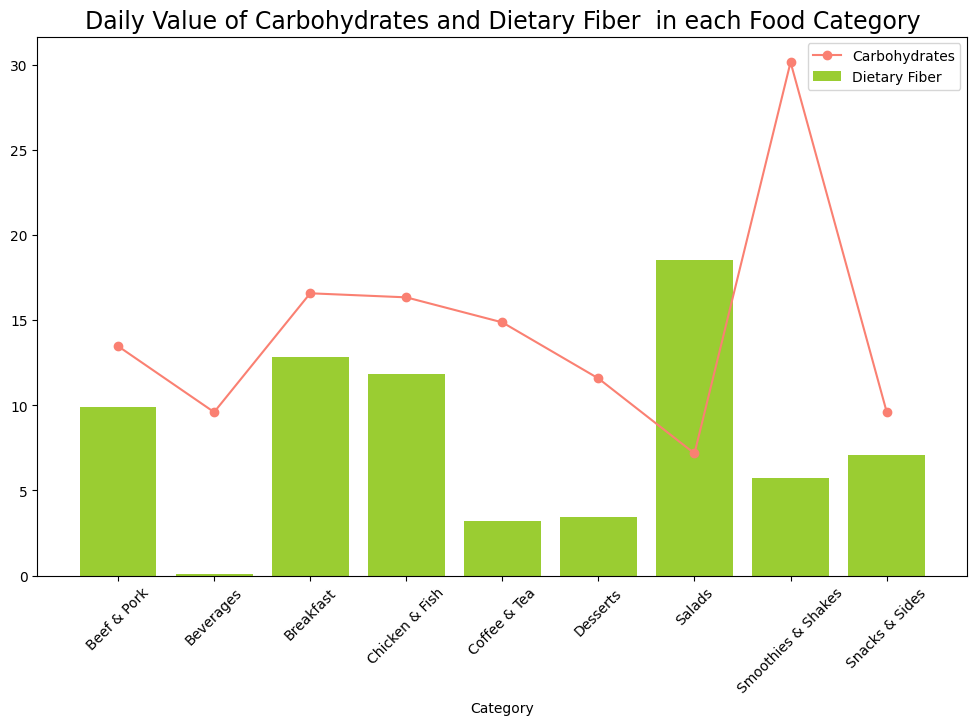

In [74]:
width = 0.20
plt.figure(figsize=(12,7))
plt.plot(r ,charb["Carbohydrates (% Daily Value)"], 'o-', label = 'Carbohydrates', color='salmon')
plt.bar(r  ,charb["Dietary Fiber (% Daily Value)"], label = 'Dietary Fiber', color='yellowgreen')
plt.xticks(r, charb['Category'], rotation=45)
plt.xlabel('Category')
plt.legend()
plt.title('Daily Value of Carbohydrates and Dietary Fiber  in each Food Category', fontsize=17)
plt.show()

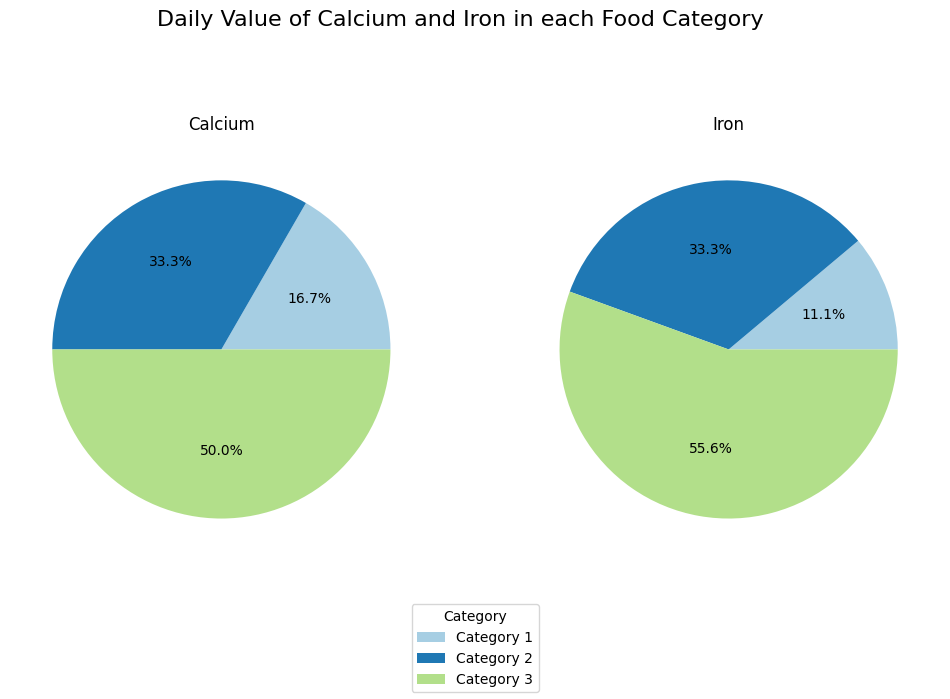

In [75]:
# Import the necessary module
import pandas as pd

# Create a DataFrame named 'minerals'
minerals = pd.DataFrame({
    "Category": ["Category 1", "Category 2", "Category 3"],
    "Calcium (% Daily Value)": [10, 20, 30],
    "Iron (% Daily Value)": [5, 15, 25]
})

# Use the 'minerals' DataFrame in the code
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))

ax1.pie(minerals["Calcium (% Daily Value)"], autopct='%1.1f%%', pctdistance=0.6, colors=sns.color_palette("Paired"))
ax1.set_title('Calcium')
ax2.pie(minerals["Iron (% Daily Value)"], autopct='%1.1f%%', pctdistance=0.6, colors=sns.color_palette("Paired"))
ax2.set_title('Iron')

# Adding legend
fig.legend(minerals['Category'],
          title="Category",
          loc="lower center",)
fig.suptitle('Daily Value of Calcium and Iron in each Food Category', fontsize=16)

plt.show()

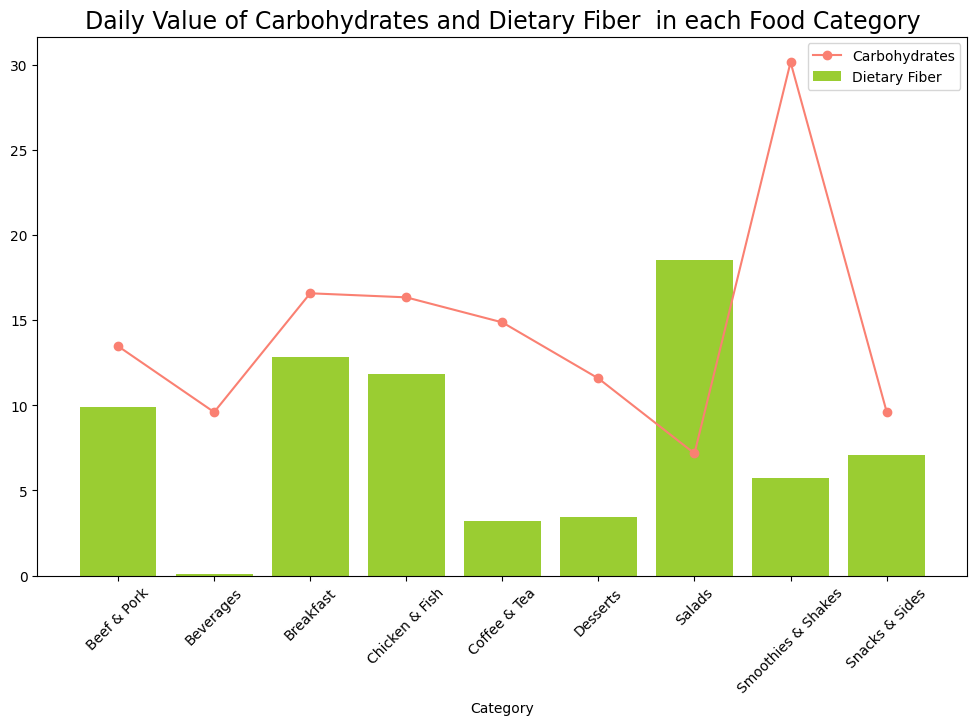

In [76]:
width = 0.20
plt.figure(figsize=(12,7))
plt.plot(r ,charb["Carbohydrates (% Daily Value)"], 'o-', label = 'Carbohydrates', color='salmon')
plt.bar(r  ,charb["Dietary Fiber (% Daily Value)"], label = 'Dietary Fiber', color='yellowgreen')
plt.xticks(r, charb['Category'], rotation=45)
plt.xlabel('Category')
plt.legend()
plt.title('Daily Value of Carbohydrates and Dietary Fiber  in each Food Category', fontsize=17)
plt.show()

The code creates two pie charts displaying the daily values of calcium and iron across various food categories. Each chart represents the percentages of the respective mineral's daily value for each category. The figure includes titles for each chart and a legend indicating the categories. This visualization offers a concise view of the distribution of calcium and iron in different food categories.

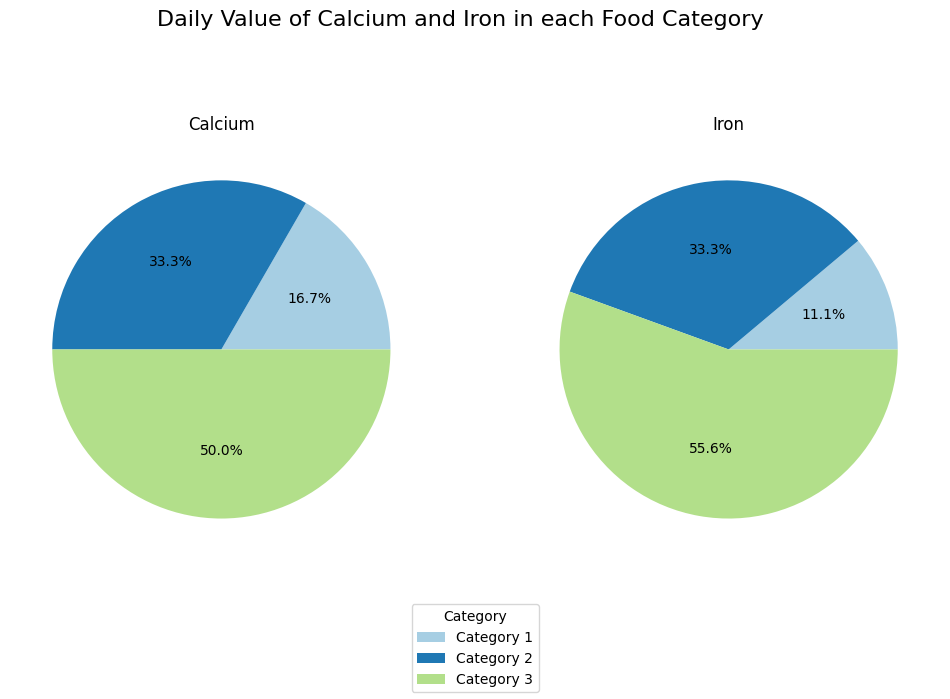

In [77]:
fig, (ax1, ax2 )= plt.subplots(1, 2, figsize=(12,7))
ax1.pie(minerals["Calcium (% Daily Value)"], autopct='%1.1f%%',pctdistance=0.6, colors=sns.color_palette("Paired") )
ax1.set_title('Calcium')
ax2.pie(minerals["Iron (% Daily Value)"], autopct='%1.1f%%',pctdistance=0.6,colors=sns.color_palette("Paired") )
ax2.set_title('Iron')
# Adding legend
fig.legend(minerals['Category'],
          title ="Category",
          loc ="lower center",)
fig.suptitle('Daily Value of Calcium and Iron in each Food Category', fontsize=16)
plt.show()

In [78]:
# Create a DataFrame named 'fat'
fat = pd.DataFrame({
    "Category": ["Category 1", "Category 2", "Category 3"],
    "Total Fat (% Daily Value)": [10, 20, 30],
    "Saturated Fat (% Daily Value)": [5, 15, 25]
})

The code generates a horizontal grouped bar plot comparing the daily values of total fat and saturated fat across different food categories. Each category is represented by grouped bars, with one set for total fat and another for saturated fat. This visualization allows for easy comparison of the nutritional content of foods in terms of these two types of fats.

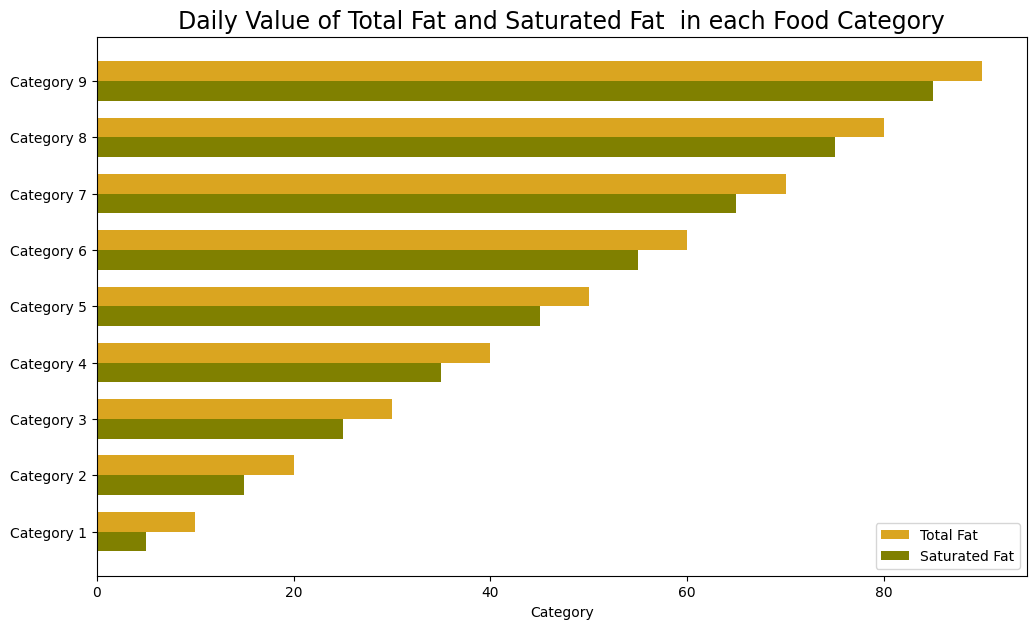

In [79]:
# Create a DataFrame named 'fat' with 9 rows
fat = pd.DataFrame({
    "Category": ["Category 1", "Category 2", "Category 3", "Category 4", "Category 5", "Category 6", "Category 7", "Category 8", "Category 9"],
    "Total Fat (% Daily Value)": [10, 20, 30, 40, 50, 60, 70, 80, 90],
    "Saturated Fat (% Daily Value)": [5, 15, 25, 35, 45, 55, 65, 75, 85]
})

# Rest of the code remains the same

n = 9
r = np.arange(n)
height = 0.35
plt.figure(figsize=(12, 7))
plt.barh(r + 0.5 * height, fat["Total Fat (% Daily Value)"], height, label='Total Fat', color='goldenrod')
plt.barh(r - 0.5 * height, fat["Saturated Fat (% Daily Value)"], height, label='Saturated Fat', color='olive')
plt.yticks(r, fat['Category'])
plt.xlabel('Category')
plt.legend()
plt.title('Daily Value of Total Fat and Saturated Fat  in each Food Category', fontsize=17)
plt.show()

In [80]:
data.sample(5).T

,62,3,213,234,7
Category,Chicken & Fish,Breakfast,Coffee & Tea,Smoothies & Shakes,Breakfast
Item,Premium Grilled Chicken Ranch BLT Sandwich,Sausage McMuffin with Egg,Iced Mocha (Large),Blueberry Pomegranate Smoothie (Large),"Bacon, Egg & Cheese Biscuit (Large Biscuit)"
Serving Size,7.6 oz (217 g),5.7 oz (161 g),22 fl oz cup,22 fl oz cup,5.8 oz (164 g)
Calories,450,450,480,340,520
Calories from Fat,130,250,150,10,270
Total Fat,15.0,28.0,16.0,1.0,30.0
Total Fat (% Daily Value),23,43,25,2,47
Saturated Fat,4.5,10.0,10.0,0.5,14.0
Saturated Fat (% Daily Value),22,52,49,3,68
Trans Fat,0.0,0.0,0.5,0.0,0.0


<Figure size 1200x700 with 0 Axes>

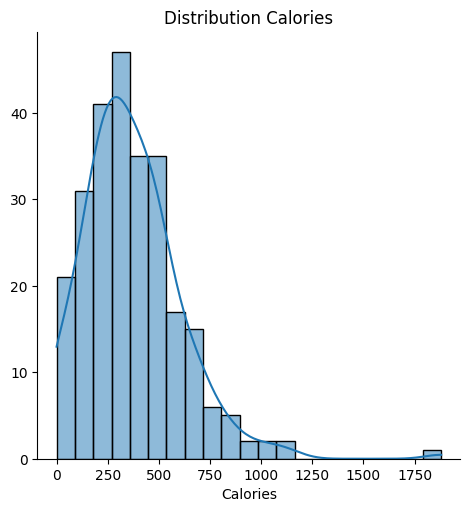

In [81]:
plt.figure(figsize=(12,7))
sns.displot(data["Calories"], kde=True)
plt.ylabel('')
plt.title("Distribution Calories")
plt.show()

#**Conclusion**
The analysis of the retail sales dataset has yielded valuable insights for strategic decision-making. Through time series analysis, we've identified sales trends over time, essential for forecasting and inventory management. Customer demographics and behavior analysis uncovered target audience preferences, enabling personalized marketing strategies. Product performance evaluation highlighted opportunities for cross-selling and product optimization. Descriptive statistics provided a comprehensive understanding of sales data variability. Visualizations facilitated easier interpretation and communication of insights. Actionable recommendations include refining marketing efforts and enhancing the overall shopping experience, positioning the company for sustained growth and increased profitability in the competitive market.
